In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
data = pd.read_csv("churn_prediction_simple.csv")
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [149]:
# Seprating the data set on the basis of dependent and independent variable
X = data.drop(columns=['churn','customer_id','gender','vintage','age','city','dependents','occupation','customer_nw_category','branch_code','days_since_last_transaction','previous_month_end_balance','current_month_credit','previous_month_credit','current_month_balance'])
Y = data['churn']

In [150]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   current_balance                 22067 non-null  float64
 1   average_monthly_balance_prevQ   22067 non-null  float64
 2   average_monthly_balance_prevQ2  22067 non-null  float64
 3   current_month_debit             22067 non-null  float64
 4   previous_month_debit            22067 non-null  float64
 5   previous_month_balance          22067 non-null  float64
dtypes: float64(6)
memory usage: 1.0 MB


In [151]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [152]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_X,Y,train_size=0.80,stratify=Y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17653, 6), (4414, 6), (17653,), (4414,))

## Model Buiding , Predictions

In [153]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DTC(class_weight='balanced')
classifier=DTC()
#it is a imbalanced datset.

In [154]:
classifier.fit(x_train,y_train)
predicted_values = classifier.predict(x_train)

In [155]:
predicted_values[:30]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

- performing the evalutaion metrics on the training data set.

In [156]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



- Conclusion: It is perfectly showing value of 1 in every field. Hence it has shown good job in learning from training data. 

In [157]:
# For test set
prediction_values = classifier.predict(x_test)
print(classification_report(y_test,prediction_values))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      3559
           1       0.43      0.44      0.44       855

    accuracy                           0.78      4414
   macro avg       0.65      0.65      0.65      4414
weighted avg       0.78      0.78      0.78      4414



### Overfitting
If the model is performing too well on the training data but the performance drops significantly over the test then it is called overfitting.

### Underfitting
If the model is not learning and consistently performing poorly over the test and the train set then it is called underfitting.

### Best-fit model
If the model performs equally on train and test then it is called best-fit


In [158]:
"""from sklearn.tree import export_graphviz
export_graphviz(decision_tree = classifier,out_file='tree_viz',max_depth=None,feature_names=X.columns,
                 label=None,impurity=False)"""

"from sklearn.tree import export_graphviz\nexport_graphviz(decision_tree = classifier,out_file='tree_viz',max_depth=None,feature_names=X.columns,\n                 label=None,impurity=False)"

In [159]:
"""import graphviz
from graphviz import render
render(filepath='tree_viz',format='png',engine='neato')"""

"import graphviz\nfrom graphviz import render\nrender(filepath='tree_viz',format='png',engine='neato')"

Our model is overfitted, as DT is a non parametric algorithm therefore there are no parameter which can control overfitting, but there are criteria which can do this.Therefore we need to do hyperparameter tuning.

- The DT tries to learn each and every point in the data set resulting in an overfitting model

## Hyperparameter Tuning

In [160]:
classifier = DTC()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

### 1. Controling the Max depth

In [161]:
from sklearn.metrics import f1_score
def calc_score(model,x1,y1,x2,y2):
  model.fit(x1,y1)
  predict = model.predict(x1)
  f1 = f1_score(y1,predict)

  predict = model.predict(x2)
  f2 = f1_score(y2,predict)

  return f1,f2

- the purpose of this function is to display the effect of decision tree for various parameters(viz. depth, etc) in the tex\st and train set

In [162]:
def effects(train_score,test_score,x_axis,title):
  plt.figure(figsize=(5,7),dpi=100)
  plt.plot(x_axis,train_score,color='red',label='train_score')
  plt.plot(x_axis,test_score,color='blue',label='test_score')
  plt.title(title)
  plt.legend()
  plt.xlabel("Parameter_Value")
  plt.ylabel("f1 score")
  plt.show()

In [163]:
max_depth = [i for i in range(1,50)]
train=[]
test=[]

for i in max_depth:
  model = DTC(class_weight='balanced',max_depth=i,random_state=42)
  f1,f2 = calc_score(model,x_train,y_train,x_test,y_test)
  train.append(f1)
  test.append(f2)

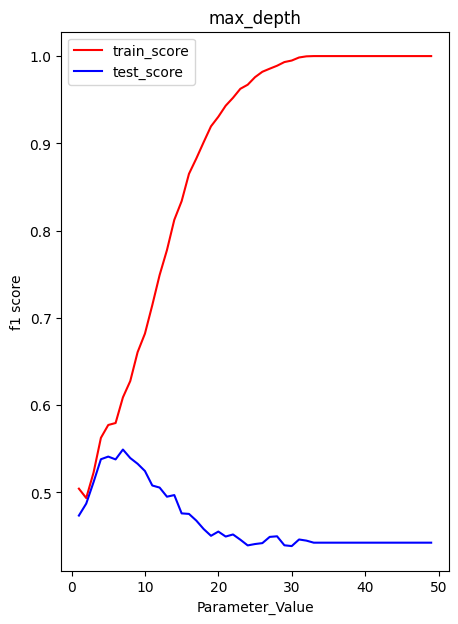

In [164]:
effects(train,test,range(1,50),'max_depth')

- We observe from the graph that the train score increases as the max depth of the DT increases
- But the test score increases to a certain point with the increses in the depth of the decision tree but decreses there after.
- This arises due to the overfiting of the training set and therfore not able to generalize over the unseen points in the datset

### 2. MIN SAMPLE SPLIT
- The minimum number of observations in any given nodes in order to split it.

In [165]:
min_samples = [i for i in range(2,5000, 25)]
train = []
test = []

for i in min_samples:  
  model = DTC(class_weight = 'balanced', min_samples_split = i, random_state = 42)
  f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

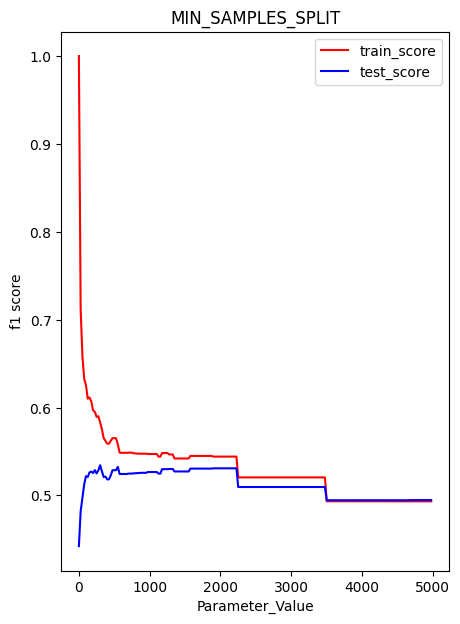

In [166]:
effects(train,test,range(2,5000, 25),'MIN_SAMPLES_SPLIT')

- For small no. of samples in nodes there is a significant difference between the test score and the train score.(Overfiting)
- As the no. of samples increases in terminal nodes  there is a significant decrease in the differnce between the f1 value of test score and the test score.
- But when we increases the no. of samples too much there is a significant dip on both the test score and the train score as observed from the f1 score.
- According to the graph the DT is performing optimally between the range of 950 and 1000 as the diff. in the test score and the train score is in the optimal range.


 ### Max Leaf Nodes

In [167]:
maxleafnodes = [i for i in range(2,200, 10)]
train = []
test = []

for i in maxleafnodes:  
  model = DTC(class_weight = 'balanced', max_leaf_nodes = i, random_state = 42)
  f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

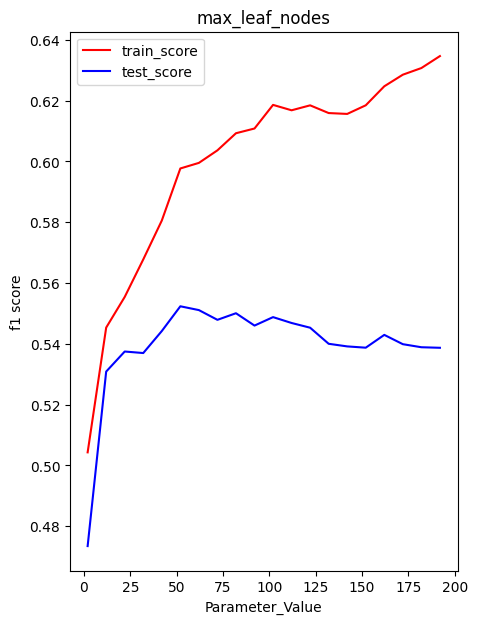

In [168]:
effects(train,test,range(2,200,10),'max_leaf_nodes')

- The Tree starts to overfit when the maximum leaf nodes increases over 25 since the test score decreases significantly for increase in train score.
- The tree underfits when the no. of leaf nodes is very less.


## Min_sample_leaf

In [169]:
minsamplesleaf = [i for i in range(2,4000, 25)]
train = []
test = []

for i in minsamplesleaf:  
  model = DTC(class_weight = 'balanced', min_samples_leaf = i, random_state = 42)
  f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

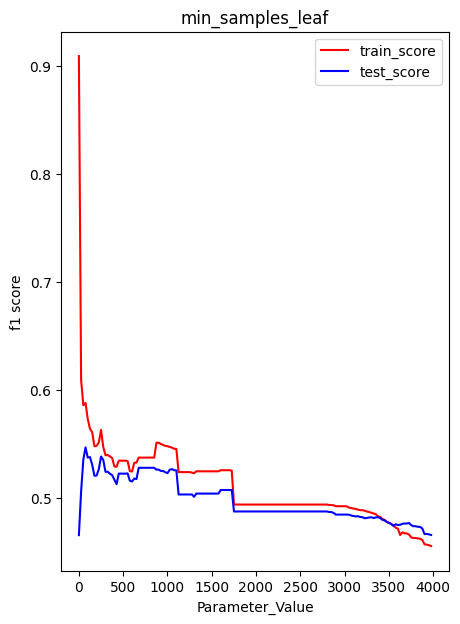

In [170]:
effects(train,test,range(2,4000,25),'min_samples_leaf')

- Initially the model overfits and then the  model rectifies itself quicklly, but further incresaing no. of samples (that must exist in the leaf node for it to become valid) the model starts to underfit.

## Feature Engineering
- which we have found in hyperparmeter tuning

In [178]:
model = DTC(max_depth=6,min_samples_split = 500,max_leaf_nodes=15,min_samples_leaf=250)
model.fit(x_train,y_train)
feature_imp = pd.Series(model.feature_importances_, index = X.columns)
k = feature_imp.sort_values()

In [179]:
predicted_values1 = model.predict(x_train)
predicted_values1.shape

(17653,)

In [180]:
# Evalution Metrics
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values1))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     14234
           1       0.69      0.40      0.50      3419

    accuracy                           0.85     17653
   macro avg       0.78      0.68      0.71     17653
weighted avg       0.83      0.85      0.83     17653



In [181]:
# For test set
prediction_values1 = model.predict(x_test)
prediction_values1.shape

(4414,)

In [182]:
# Evalution Metrics for test data set
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction_values1))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      3559
           1       0.63      0.38      0.47       855

    accuracy                           0.84      4414
   macro avg       0.75      0.66      0.69      4414
weighted avg       0.82      0.84      0.82      4414



In [183]:
k

average_monthly_balance_prevQ2    0.019743
previous_month_balance            0.020531
previous_month_debit              0.031614
average_monthly_balance_prevQ     0.061489
current_month_debit               0.095027
current_balance                   0.771597
dtype: float64

Text(0.5, 1.0, 'Feature Importance')

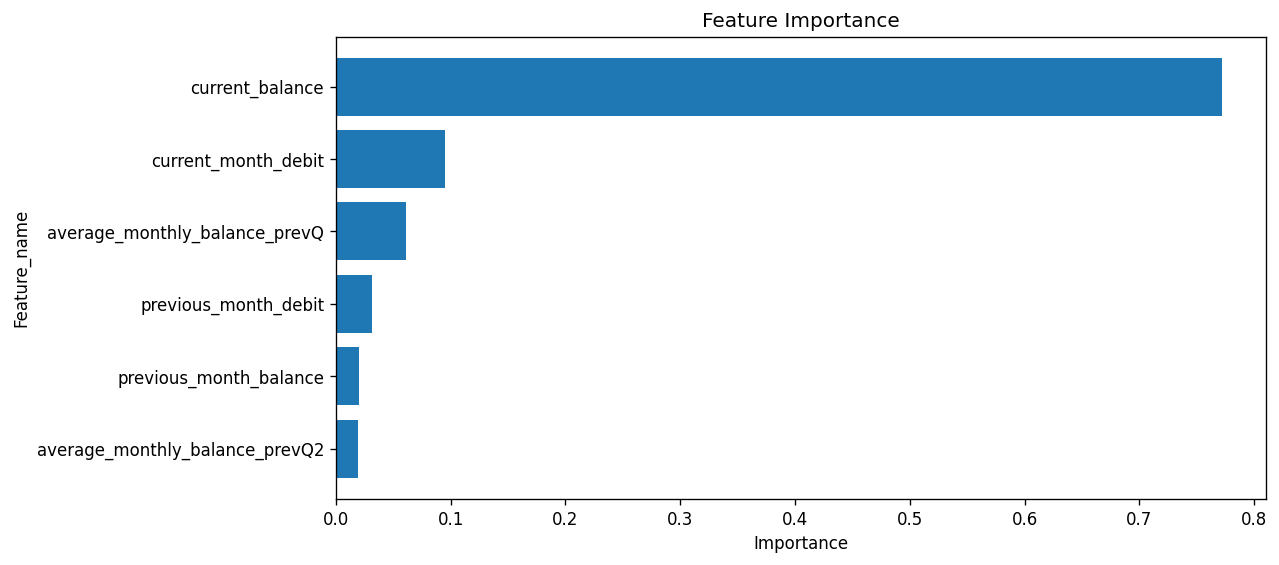

In [184]:
plt.figure(figsize=(10,5),dpi=120)
plt.barh(k.index,k)
plt.xlabel("Importance")
plt.ylabel("Feature_name")
plt.title('Feature Importance')